In [88]:
#pd.reset_option('all')

In [143]:
#importing the required libraries
import pandas as pd , numpy as np, matplotlib.pyplot as plt, warnings ,seaborn as sns

In [144]:
#For the output of plotting commands to be displayed inline
%matplotlib inline

#To Suppress Warnings
warnings.filterwarnings("ignore")
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)


In [145]:
loan_df= pd.read_csv("loan.csv")

In [146]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [147]:
loan_df.shape

(39717, 111)

In [148]:
loan_df.columns = loan_df.columns.str.replace(' ', '')

In [149]:
loan_df.dropna(how='all',axis=1,inplace=True)

In [150]:
loan_df.shape

(39717, 57)

In [151]:
data_dict= pd.read_excel("Data_Dictionary.xlsx")
data_dict.dropna(how='all', axis='columns',inplace=True)
data_dict.dropna(how='any', axis='rows',inplace=True)

In [152]:
data_dict.set_index('LoanStatNew',inplace=True)

In [153]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

,Description
LoanStatNew,
id,A unique LC assigned ID for the loan listing.
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade


In [154]:
pd.reset_option('max_colwidth')

 ## doubts on variables   
    - open_acc	
    - pub_rec	
    - revol_bal	
    - revol_util	
    - total_acc
    - initial_list_status
    - collections_12_mths_ex_med
    - policy_code
    - acc_now_delinq
    - chargeoff_within_12_mths
    - delinq_amnt	

In [155]:
non_driving_variables = ['funded_amnt','funded_amnt_inv','url','delinq_2yrs','inq_last_6mths','mths_since_last_delinq',
                         'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                        'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
                        ]


In [156]:
loan_df.drop(columns=non_driving_variables,axis=1,inplace=True)

In [157]:
loan_df.shape

(39717, 39)

In [158]:
loan_df.columns.values

array(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'earliest_cr_line', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'], dtype=object)

In [159]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

,Description
LoanStatNew,
id,A unique LC assigned ID for the loan listing.
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*


In [160]:
pd.reset_option('max_colwidth')

In [161]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [162]:
def zero_NA_percentage(col):
    col.value_counts(dropna=False).plot.pie(autopct='%.2f',figsize=(4,4))
    plt.show()

### tax_liens - All the values are either 0 or NA

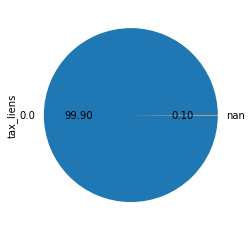

In [163]:
zero_NA_percentage(loan_df['tax_liens'])

In [164]:
loan_df.drop(columns=['tax_liens'],axis=1,inplace=True)

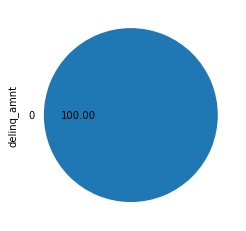

In [165]:
zero_NA_percentage(loan_df['delinq_amnt'])

In [166]:
loan_df.drop(columns=['delinq_amnt'],axis=1,inplace=True)

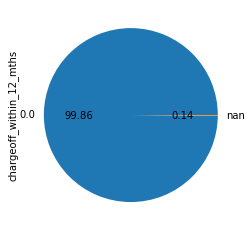

In [167]:
zero_NA_percentage(loan_df['chargeoff_within_12_mths'])

In [168]:
loan_df.drop(columns=['chargeoff_within_12_mths'],axis=1,inplace=True)

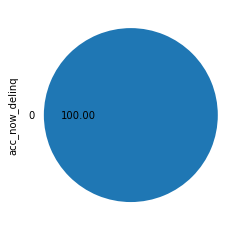

In [169]:
zero_NA_percentage(loan_df['acc_now_delinq'])

In [170]:
loan_df.drop(columns=['acc_now_delinq'],axis=1,inplace=True)

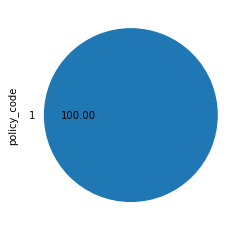

In [171]:
zero_NA_percentage(loan_df['policy_code'])

In [172]:
loan_df.drop(columns=['policy_code'],axis=1,inplace=True)

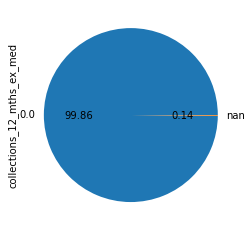

In [173]:
zero_NA_percentage(loan_df['collections_12_mths_ex_med'])

In [174]:
loan_df.drop(columns=['collections_12_mths_ex_med'],axis=1,inplace=True)

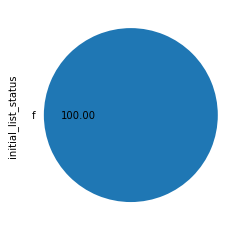

In [175]:
zero_NA_percentage(loan_df['initial_list_status'])

In [176]:
loan_df.drop(columns=['initial_list_status'],axis=1,inplace=True)

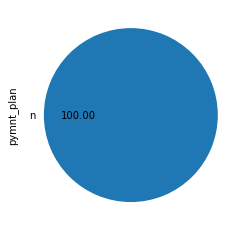

In [177]:
zero_NA_percentage(loan_df['pymnt_plan'])

In [178]:
loan_df.drop(columns=['pymnt_plan'],axis=1,inplace=True)

In [179]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'application_type',
       'pub_rec_bankruptcies'],
      dtype='object')

In [180]:
loan_df.shape

(39717, 31)

In [181]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

#### check to see if any numeric column types needs to be corrected

In [194]:
loan_df.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

#### check rows and columns with  missing values
     39717 total entries
     

In [200]:
(len(loan_df.desc)-loan_df.desc.count())/len(loan_df.desc)* 100

32.58050708764509

In [ ]:
loan_df.drop(columns=['desc'],axis=1,inplace=True)

In [205]:
loan_df.shape

(39717, 30)

In [208]:

(len(loan_df.mths_since_last_record)-loan_df.mths_since_last_record.count())/len(loan_df.mths_since_last_record)* 100

92.98537150338646

In [209]:
loan_df.drop(columns=['mths_since_last_record'],axis=1,inplace=True)

##### dropping id and member_id , since they wont be affect any analysis

In [234]:
loan_df.drop(columns=['id'],axis=1,inplace=True)
loan_df.drop(columns=['member_id'],axis=1,inplace=True)

In [235]:
loan_df.shape

(38577, 27)

## Final dataframe after data cleaning of missing and empty columns

In [236]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_title             36191 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  int64  
 13  purpose               38577 non-null  object 
 14  title                 38566 non-null  object 
 15  zip_code           

In [237]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."


In [238]:
pd.reset_option('max_colwidth')

# Data Analysis

In [218]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

###  dropping rows with loan _status as Current

In [222]:
loan_df=loan_df[~(loan_df.loan_status=='Current')]

In [224]:
loan_df.shape

(38577, 29)

#### putting 1 or 0 for Fully Paid and Charged Off respectively , so that it can be treated for  numerical analysis 

In [231]:
loan_df.loan_status= loan_df.loan_status.apply(lambda x:1 if x=='Fully Paid' else 0)

### Univariate Analysis